In [2]:
import pandas as pd
import gender_guesser.detector as gender
import re
import time
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Data/data.csv')

In [4]:
data.head(50)

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking,gender
0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
1,"11 February 2020, Tuesday",SIS GSR 2-1,19:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
2,"11 February 2020, Tuesday",SIS GSR 2-1,20:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
3,"11 February 2020, Tuesday",SIS GSR 2-1,20:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
4,"11 February 2020, Tuesday",SIS GSR 2-2,11:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
5,"11 February 2020, Tuesday",SIS GSR 2-2,12:00,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
6,"11 February 2020, Tuesday",SIS GSR 2-2,12:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
7,"11 February 2020, Tuesday",SIS GSR 2-2,13:00,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
8,"11 February 2020, Tuesday",SIS GSR 2-2,13:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
9,"11 February 2020, Tuesday",SIS GSR 2-2,14:00,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female


In [5]:
data1 = data

In [6]:
data_unexp = pd.read_csv('Data/data_unexpanded.csv')
data_unexp = data_unexp.drop(columns=['gender'])

In [7]:
data_unexp

,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00-21:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,1,"11 February 2020, Tuesday",SIS GSR 2-2,11:30-15:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting
2,2,"11 February 2020, Tuesday",SIS GSR 2-2,15:30-19:30,Confirmed,BK-20200203-001315,"CHUA ZHI NING, CHARLOTTE",Student,znchua.2019@sis.smu.edu.sg,AdHoc,study
3,3,"11 February 2020, Tuesday",SIS GSR 2-3,12:00-15:00,Confirmed,BK-20200129-001198,LIM JIA WEN,Student,jiawen.lim.2018@business.smu.edu.sg,AdHoc,study
4,4,"11 February 2020, Tuesday",SIS GSR 2-3,15:00-17:00,Confirmed,BK-20200210-001217,"LEK JAN YEE, LOIS",Student,lois.lek.2018@sis.smu.edu.sg,AdHoc,Meeting
...,...,...,...,...,...,...,...,...,...,...,...
5303,674,"29 January 2020, Wednesday",SOL-B1.11-GS,16:00-17:00,Confirmed,BK-20200128-000154,NATALIE SHAUNA TAN,Student,natalietan.2019@business.smu.edu.sg,Academic,Meeting
5304,675,"29 January 2020, Wednesday",SOL-B1.11-GS,17:00-18:30,Confirmed,BK-20200127-000085,"CHENG SIN HUI, CHELSEA",Student,shcheng.2017@socsc.smu.edu.sg,AdHoc,meeting
5305,676,"29 January 2020, Wednesday",SOL-B1.11-GS,18:30-21:30,Confirmed,BK-20200128-001211,MOHAMED SHAFIE BIN ALLAMEEN,Student,mohamedsa.2017@law.smu.edu.sg,AdHoc,meeting
5306,677,"29 January 2020, Wednesday",SOL-B1.12-GS,12:00-16:00,Confirmed,BK-20200115-000789,DARRYL HOR JUN HENG,Student,darryl.hor.2018@law.smu.edu.sg,AdHoc,study


In [8]:
data2 = data_unexp

In [9]:
# remove non-student bookings
data2 = data2.drop(data2[data2['Booked for User Org Unit'] != 'Student'].index)

In [10]:
data2['Booked for User Org Unit'].value_counts()

Student    5043
Name: Booked for User Org Unit, dtype: int64

# function to get the school of the booker

In [11]:
# function to get the school of the booker
def _get_school(email):
    email_lst = email.split('@')
    end = email_lst[1]
    end_lst = end.split(".")
    school = end_lst[0]
    if school == 'socsc' or school == 'economics':
        return 'soe/soss'
    elif school == 'accountancy':
        return 'soa'
    elif school == 'business':
        return 'sob'
    elif school == 'law':
        return 'sol'
    else:
        return school

In [12]:
data3 = data2

In [13]:
data3['Bookers School'] = data3['Booked for User Email Address'].apply(lambda x: _get_school(x))

In [14]:
data3

,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking,Bookers School
0,0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00-21:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,sis
1,1,"11 February 2020, Tuesday",SIS GSR 2-2,11:30-15:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,sis
2,2,"11 February 2020, Tuesday",SIS GSR 2-2,15:30-19:30,Confirmed,BK-20200203-001315,"CHUA ZHI NING, CHARLOTTE",Student,znchua.2019@sis.smu.edu.sg,AdHoc,study,sis
3,3,"11 February 2020, Tuesday",SIS GSR 2-3,12:00-15:00,Confirmed,BK-20200129-001198,LIM JIA WEN,Student,jiawen.lim.2018@business.smu.edu.sg,AdHoc,study,sob
4,4,"11 February 2020, Tuesday",SIS GSR 2-3,15:00-17:00,Confirmed,BK-20200210-001217,"LEK JAN YEE, LOIS",Student,lois.lek.2018@sis.smu.edu.sg,AdHoc,Meeting,sis
...,...,...,...,...,...,...,...,...,...,...,...,...
5303,674,"29 January 2020, Wednesday",SOL-B1.11-GS,16:00-17:00,Confirmed,BK-20200128-000154,NATALIE SHAUNA TAN,Student,natalietan.2019@business.smu.edu.sg,Academic,Meeting,sob
5304,675,"29 January 2020, Wednesday",SOL-B1.11-GS,17:00-18:30,Confirmed,BK-20200127-000085,"CHENG SIN HUI, CHELSEA",Student,shcheng.2017@socsc.smu.edu.sg,AdHoc,meeting,soe/soss
5305,676,"29 January 2020, Wednesday",SOL-B1.11-GS,18:30-21:30,Confirmed,BK-20200128-001211,MOHAMED SHAFIE BIN ALLAMEEN,Student,mohamedsa.2017@law.smu.edu.sg,AdHoc,meeting,sol
5306,677,"29 January 2020, Wednesday",SOL-B1.12-GS,12:00-16:00,Confirmed,BK-20200115-000789,DARRYL HOR JUN HENG,Student,darryl.hor.2018@law.smu.edu.sg,AdHoc,study,sol


In [15]:
data3.groupby('Bookers School')['Facility']

In [16]:
uniform_data = np.random.rand(10, 12)

In [17]:
uniform_data

array([[0.30743875, 0.57257513, 0.27507907, 0.5757746 , 0.70177415,
        0.80766225, 0.34129131, 0.62506386, 0.00945385, 0.80207563,
        0.49679573, 0.61397942],
       [0.47352273, 0.62997949, 0.89359147, 0.4267222 , 0.89938458,
        0.94429569, 0.63379536, 0.53901403, 0.63459408, 0.98583511,
        0.45784973, 0.08479183],
       [0.90794541, 0.13854306, 0.90653571, 0.94129881, 0.0717658 ,
        0.74423867, 0.20427752, 0.791853  , 0.71017901, 0.80873726,
        0.62891162, 0.70718312],
       [0.03907311, 0.13788277, 0.69342664, 0.30163995, 0.30640735,
        0.92602663, 0.24208684, 0.85537127, 0.66832561, 0.49601716,
        0.03008875, 0.96293922],
       [0.82058698, 0.45427605, 0.97769387, 0.10383782, 0.18888729,
        0.053446  , 0.54704117, 0.87492872, 0.9737749 , 0.55357171,
        0.15462049, 0.4478619 ],
       [0.13895916, 0.46898322, 0.60998461, 0.77014015, 0.38039868,
        0.50568182, 0.50760848, 0.43644044, 0.6558365 , 0.58215021,
        0.41586101,

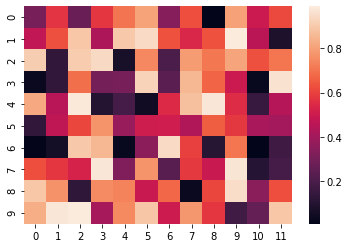

In [18]:
ax = sns.heatmap(uniform_data)

In [19]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


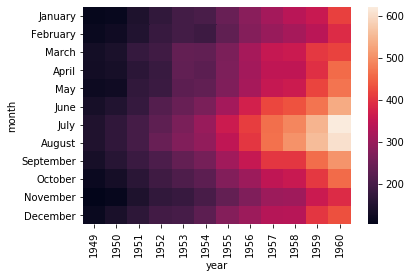

In [20]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

## Function to get gender of the booker

In [21]:
# function get gender of the booker
def _get_gender(name):
    chi_sn = ['tan', 'lim', 'lee', 'ng', 'ong', 'wong', 'goh', 'chua', 'chan', 'koh', 'teo', 'ang', 'yeo', 'tay', 'ho', 'low', 'toh', 'sim', 'chong', 'chia']
    d = gender.Detector()
    remove = ', '
    # remove all the non-caps as they are either staff/CCA groups
    if name.isupper() == False:
        return None
    
    # convert entire name to lowercase for easier manipulation
    name = name.lower()
    
    # get gender thru first name if word contains ','
    if ',' in name:
        i = name.index(',')
        word = name[i+1:]
        if word[0] in remove:
            word = word[1:]
        if word[len(word)-1] in remove:
            word = word[:-1]
        word = word.capitalize()
        return d.get_gender(word)
    
    # get gender in common connectors of muslim names
    if 'binte' in name or 'bte' in name or 'bin' in name or 'binti' in name:
        if 'bin' == name:
            return 'male'
        else:
            return 'female'
    
    # get gender by looping thru all parts of the name, removing common surnames (eg. Tan, Lim)
    # get predicted gender of each part of the name
    # eg. Jho Low Xiao Ming => ['unknown', 'unknown', 'andy', 'andy'] (gender_list)
    # finally, get gender by analysing the output-ed gender_list
    else:
        name_list = name.split(' ')
        gender_list = []
        for word in name_list:
            if word[0] in remove:
                word = word[1:]
            if word[len(word)-1] in remove:
                word = word[:-1]
            if word in chi_sn:
                continue
            word = word.capitalize()
            gender_list.append(d.get_gender(word))
            
        # get gender by first part of the name or last part of the name
        # eg. Joe Low Xiao Ming or Low Xiao Ming Joe
        if gender_list[0] == 'male' and gender_list[-1] != 'female':
            return 'male'
        if gender_list[0] == 'female' and gender_list[-1] != 'male':
            return 'female'
        if gender_list[-1] == 'male' and gender_list[0] != 'female':
            return 'male'
        if gender_list[-1] == 'female' and gender_list[0] != 'male':
            return 'female'
        
        # get gender by appending predicted gender of all parts of the name into a list, then getting the mode of the list
        else:
            temp = []
            for gender_pred in gender_list:
                match = re.search('male|female|andy|unknown', gender_pred)
                temp.append(match.group())
            return max(set(temp), key=temp.count) # returns the max 

In [24]:
# function get gender of the booker
# edit: implement dictionary to reduce computational time
#       dictionary = {name: gender}

def _get_gender2(name, gend_dict):
    if name in gend_dict:
        return gend_dict[name], gend_dict
    
    else:
        gender = _get_gender(name)
        gend_dict[name] = gender
        return gender, gend_dict

## descriptive analytics of gender

In [25]:
data.head()

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking,gender
0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
1,"11 February 2020, Tuesday",SIS GSR 2-1,19:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
2,"11 February 2020, Tuesday",SIS GSR 2-1,20:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
3,"11 February 2020, Tuesday",SIS GSR 2-1,20:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
4,"11 February 2020, Tuesday",SIS GSR 2-2,11:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female


In [26]:
data['gender'].value_counts()

male             9398
female           8446
andy             6748
unknown          5840
mostly_female     171
mostly_male        96
Name: gender, dtype: int64

In [28]:
data.groupby(['gender']).count()

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
gender,,,,,,,,,,
andy,6748,6748,6748,6748,6748,6748,6748,6748,6748,6748
female,8446,8446,8446,8446,8446,8446,8446,8446,8446,8446
male,9398,9398,9398,9398,9398,9398,9398,9398,9398,9398
mostly_female,171,171,171,171,171,171,171,171,171,171
mostly_male,96,96,96,96,96,96,96,96,96,96
unknown,5840,5840,5840,5840,5840,5840,5840,5840,5840,5840


In [181]:
def gender_visualisation(data):
    # visualisation to see which gender books more
    data_temp = data
    data_tempf = data_temp[(data_temp['gender'] == 'female')]
    data_tempm = data_temp[(data_temp['gender'] == 'male')]
    data_temp = pd.concat([data_tempf, data_tempm]) 
    sns.countplot(x='gender', data=data_temp, palette='Set3')

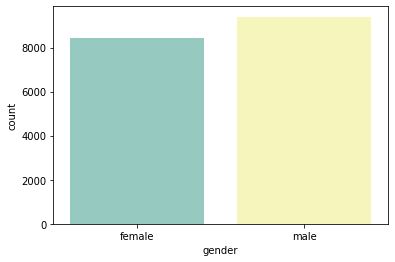

In [182]:
gender_visualisation(data)

In [43]:
from wordcloud import WordCloud, STOPWORDS 

In [159]:
data_temp = data_unexp
data_temp['Purpose of Booking'] = data_temp['Purpose of Booking'].apply(lambda x: x.lower())
data_temp[data_temp['Purpose of Booking'].str.match('xoxo')]



,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
3840,803,"5 February 2020, Wednesday",SOE/SOSS GSR 4-8,18:30-22:00,Confirmed,BK-20200204-000481,PATRICIA TAN YI CHIN,Student,patriciatan.2019@business.smu.edu.sg,AdHoc,xoxoxxox


In [153]:
# function to get wordcloud, while removing
def get_wordcloud(data_unexp):
    data_wc = data_unexp
    data_wc['Purpose of Booking'] = data_wc['Purpose of Booking'].apply(lambda x: x.lower())
    regex1 = 'meeting|meet|mtg|mtng|work|study|project|proj|group|interview|research|discussion|consultation|teaching|ta|adhoc|smu'
    filter = data_wc['Purpose of Booking'].str.contains(regex1)
    data_wc = data_wc[~filter]
    text = data_wc['Purpose of Booking'].to_string()
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 3000, height = 3000, max_words=None,
                background_color ='white', stopwords=stopwords, collocations=False, colormap=plt.cm.inferno,
                min_font_size = 30).generate(text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.show() 

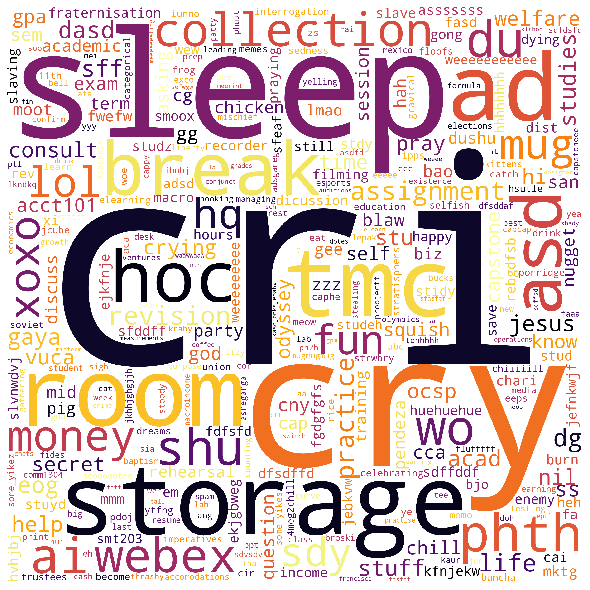

In [154]:
get_wordcloud(data)